In [2]:
# function to generate unit vector 
uvec(i, n) = [zeros(i-1); 1; zeros(n-i)]

uvec (generic function with 1 method)

In [58]:
using LinearAlgebra
x = [2, -1, 2]
norm(x)
sqrt(x'*x)

3.0

In [36]:
using Printf 

# create 2 random vectors x, y follow normal(0, 1)
x = randn(10); y = randn(10)

# check the triangle inequality 
# ||x+y|| <= ||x|| + ||y||

lhs = norm(x+y)
@printf("lhs: ||x+y|| = %f\n", lhs)

rhs = norm(x) + norm(y)
@printf("rhs: ||x|| + ||y|| = %f", rhs)

lhs: ||x+y|| = 3.467096
rhs: ||x|| + ||y|| = 5.087390

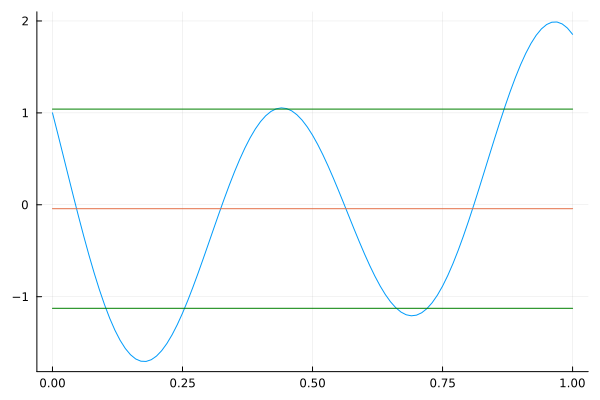

In [62]:
rms(x) = norm(x) / sqrt(length(x))
avg(x) = sum(x)/length(x)
rms([2, -1, 2, 0])
t = 0:0.01:1
# x(t) = cos(8t) - 2sin(11t)
x = cos.(8*t) - 2*sin.(11*t)
avg(x)
rms(x)
using Plots
plot(t, x)
plot!(t, avg(x)*ones(length(x)))
plot!(t, (avg(x)+rms(x))*ones(length(x)), color = :green)
plot!(t, (avg(x)-rms(x))*ones(length(x)), color = :green)
plot!(legend = false)

In [64]:
using Printf 
using VMLS
cheby_bound(x, a) = floor(norm(x)^2/a^2)

a = 1.5
cheby_bound(x, a)

52.0

# 3.2 Distance #

$ dist(x, y) = ||x - y|| $

In [66]:
u = [1.8, 2.0, -3.7, 4.7];
v = [0.6, 2.1, 1.9, -1.4];
w = [2.0, 1.9, -4.0, 4.6];

# distance(u, v), distance(u, w), distance(v, w)
norm(u-v), norm(u-w), norm(v-w) 

(8.36779540858881, 0.3872983346207417, 8.532877591996735)

In [78]:
z = ( [2,1], [7,2], [5.5,4], [4,8], [1,5], [9,6] )
x = [3, 3]
nearest_neighbor(x, z) = z[argmin([norm(x-zi) for zi in z])]
nearest_neighbor(x, z)

2-element Vector{Int64}:
 2
 1

In [90]:
# function to return a de_meaning vector of x
de_mean(x) = x .- avg(x)
x =[1, -2.2, 3]
avg(x)
de_mean(x)

(0.6, [0.4, -2.8000000000000003, 2.4])

# std deviation 
$ std(x) = \frac{||x - E(x)||}{\sqrt{n}} $

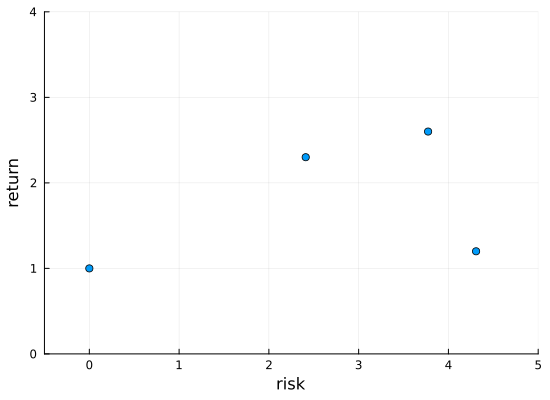

In [109]:
# function to return std deviation of x
stdev(x) = norm(de_mean(x))/sqrt(length(x))
x = rand(100)
stdev(x)
a = ones(10)
avg(a), stdev(a)
b = [ 5, 1, -2, 3, 6, 3, -1, 3, 4, 1 ];
c = [ 5, 7, -2, 2, -3, 1, -1, 2, 7, 8 ];
d = [ -1, -3, -4, -3, 7, -1, 0, 3, 9, 5 ];

abcd = [a, b, c, d]
returns = [avg(x) for x in abcd]
risks = [stdev(x) for x in abcd]
scatter(risks, returns)
plot!(xlims = (-.5, 5), ylims = (0, 4), size = [550, 400])
plot!(xlabel="risk", ylabel="return")
plot!(legend = false)

In [114]:
x = [1, -2.2, 3]
avg(x)
de_mean(x)
avg(de_mean(x))

-1.4802973661668753e-16

In [200]:
function standardize(x)
    x_tilde = x-avg(x)*ones(length(x))
    return x_tilde/stdev(x)
end
x = rand(1000)
norm(x), avg(x), rms(x)
z = standardize(x)
avg(z), stdev(z)

(2.657873920952625e-16, 1.0)

# Angle of 2 vectors x,  y #

$ \theta = cos^{-1}(\frac{x^{T}y}{||x||||y||}) $

In [203]:
theta(x, y) = acos(x'*y/(norm(x)*norm(y)))
a = [1, 2, -1]; b = [2, 0, -3]
theta(a, b)
theta(a,b)*360/(2*pi)

55.51861062801842

# Correlation coefficient #

$ \rho(a,b) = \frac{\tilde{a}^T\tilde{a}}{||\tilde{a}||*||\tilde{b}||}$

In [204]:
de_mean(x) = x .- avg(x)
function rho(a, b)
    a_tilde = de_mean(a)
    b_tilde = de_mean(b)
    return (a_tilde'*b_tilde)/(norm(a_tilde)*norm(b_tilde))
end

a = [4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4];
b = [6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2];
rho(a, b)

0.9678196342570434

In [211]:
x = randn(10^6)
y = randn(10^6)
@time rho(x, y)
x = randn(10^7)
y = randn(10^7)
@time rho(x, y)

  0.005596 seconds (5 allocations: 15.259 MiB)


0.00044885616434356553